In [30]:
import requests, xmltodict
import pandas as pd
from io import BytesIO
import boto3
from matplotlib import  pyplot as plt
def upload_data(valute, uploadFile=True):
    s3 = boto3.resource('s3')
    boto_bucket = s3.Bucket('lab2-console-aws-cli')
    url = 'https://bank.gov.ua/NBU_Exchange/exchange_site'
    params = dict(start="20210101", end="20211231", valcode=valute, sort='exchangedate', order='desc', json=None)
    headers = {'X-Requested-With': 'XMLHttpRequest'}
    response = requests.get(url, params=params, headers=headers)
    o = xmltodict.parse(response.text)
    df = pd.DataFrame(o['exchange']['currency'])
    df['exchangedate'] = df['exchangedate'].apply(pd.to_datetime, dayfirst=True)
    file = BytesIO()
    df.to_csv(file)
    file.seek(0)
    if uploadFile:
        boto_bucket.upload_fileobj(file, "csv_tables/file"+valute.upper()+".csv")
    return df.iloc[:, [0, 2, 5]]
def downloaded_file(path):
    s3 = boto3.resource('s3')
    boto_bucket = s3.Bucket('lab2-console-aws-cli')
    downloaded_file = BytesIO()
    boto_bucket.download_fileobj(path, Fileobj=downloaded_file)
    downloaded_file.seek(0)
    return downloaded_file
upload_data('USD')
upload_data('EUR')
df = pd.read_csv(downloaded_file('csv_tables/fileUSD.csv'))
df1 = pd.read_csv(downloaded_file('csv_tables/fileEUR.csv'))
df['exchangedate'] = df['exchangedate'].apply(pd.to_datetime, dayfirst=True)
df1['exchangedate'] = df['exchangedate'].apply(pd.to_datetime, dayfirst=True)

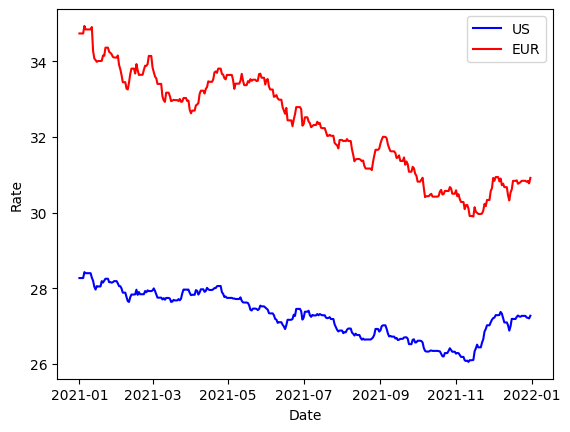

In [31]:
df['rate'] = [float(i) for i in df['rate'].values]
df1['rate'] = [float(i) for i in df1['rate'].values]
x = df['exchangedate']
y = df['rate']
x1 = df1['exchangedate']
y1 = df1['rate']
plt.plot(x, y, color='blue', label = 'US')
plt.xlabel('Date')
plt.ylabel('Rate')
plt.plot(x1, y1, color='red', label='EUR')
plt.legend(loc='upper right')
plt.show()